## About

This page showcases the work of [Tuo Wang](https://tuowang.rbind.io/) that introduces packages to make [`ggplot2`](https://ggplot2.tidyverse.org/) plots more beautiful. You can find the original [R](https://www.r-graph-gallery.com/) code on Tuo's blog [here](https://tuowang.rbind.io). 

Thanks to him for accepting sharing his work here! Thanks also to [Tomás Capretto](https://tomicapretto.github.io/) who translated this work from R to Python! 🙏🙏

As a teaser, here is the plot we’re gonna try building:

![scatterplot](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-radar-chart-with-matplotlib-square.png?raw=true)

## Load libraries

The first step is always to import some libraries. `NumPy` is going to be used to make some computations with arrays and `load_penguins()` is imported from the `palmerpenguins` library to have access to the popular dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.lines import Line2D
from palmerpenguins import load_penguins

## Load and prepare the data

Today's data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). This dataset was popularized by [Allison Horst](https://www.allisonhorst.com/) in her R package [`palmerpenguins`](https://allisonhorst.github.io/palmerpenguins/) with the goal to offer an alternative to the iris dataset for data exploration and visualization.

In [2]:
penguins = load_penguins()
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


After dropping observations with missing values, it's necessary to compute the mean value for the numerical variables that will be displayed in the radar chart. Then, with the aid of the `rescale()` function, these summaries are rescaled to \[0,1\].

In [3]:
penguins = penguins.dropna()

In [4]:
def rescale(x):
    return (x - np.min(x)) / np.ptp(x)

In [5]:
penguins_radar = (
    penguins.groupby('species').agg(
        avg_bill_length = ("bill_length_mm", np.mean),
        avg_bill_depth = ("bill_depth_mm", np.mean),
        avg_flipper_length = ("flipper_length_mm", np.mean),
        avg_body_mass = ("body_mass_g", np.mean)
    )
    .apply(lambda x: rescale(x))
    .reset_index()
)

Let's have a final look to the data before starting to code.

In [6]:
penguins_radar

,species,avg_bill_length,avg_bill_depth,avg_flipper_length,avg_body_mass
0,Adelie,0.000000,0.978584,0.000000,0.000000
1,Chinstrap,1.000000,1.000000,0.210846,0.019422
2,Gentoo,0.873549,0.000000,1.000000,1.000000


## Basic radar plot

As usually, colors and other important values are declared before the code that actually produces the plot.

In [7]:
BG_WHITE = "#fbf9f4"
BLUE = "#2a475e"
GREY70 = "#b3b3b3"
GREY_LIGHT = "#f2efe8"
COLORS = ["#FF5A5F", "#FFB400", "#007A87"]

In [8]:
# The three species of penguins
SPECIES = penguins_radar["species"].values.tolist()

# The four variables in the plot
VARIABLES = penguins_radar.columns.tolist()[1:]
VARIABLES_N = len(VARIABLES)

# The angles at which the values of the numeric variables are placed
ANGLES = [n / VARIABLES_N * 2 * np.pi for n in range(VARIABLES_N)]
ANGLES += ANGLES[:1]

# Padding used to customize the location of the tick labels
X_VERTICAL_TICK_PADDING = 5
X_HORIZONTAL_TICK_PADDING = 50    

# Angle values going from 0 to 2*pi
HANGLES = np.linspace(0, 2 * np.pi)

# Used for the equivalent of horizontal lines in cartesian coordinates plots 
# The last one is also used to add a fill which acts a background color.
H0 = np.zeros(len(HANGLES))
H1 = np.ones(len(HANGLES)) * 0.5
H2 = np.ones(len(HANGLES))

Radar charts plot data points in a circular layout. Instead of horizontal and vertical axes, it has an **angular** and a **radial** axis for **x** and **y**, respectively. In this world, **x** values are given by **angles** and **y** values are a **distance** from the center of the circle.

For today's visualization, **x** axis represents the variables, and **y** axis their scaled mean. The locations for **x**, given in angles, should be manually calculated and passed to matplotlib. That is what is going on in `n / VARIABLES_N * 2 * np.pi` in the list comprehension above. The **y** values are already given in the data frame.

Want to see how it looks like? Let's do it!

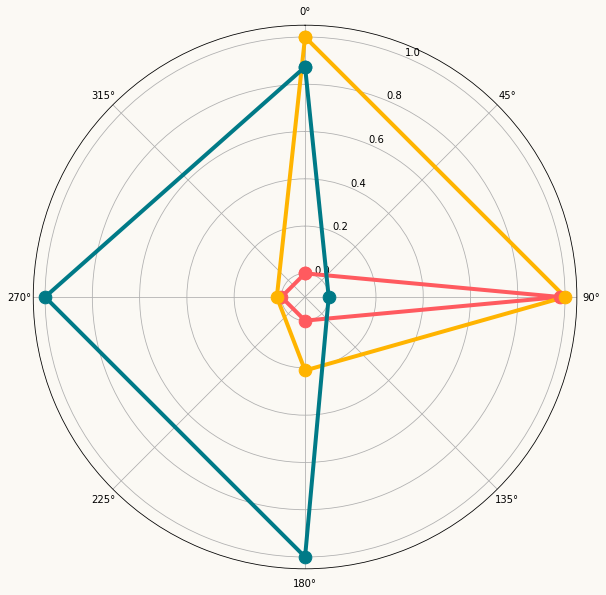

In [9]:
# Initialize layout ----------------------------------------------
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, polar=True)

fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Rotate the "" 0 degrees on top. 
# There it where the first variable, avg_bill_length, will go.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Setting lower limit to negative value reduces overlap
# for values that are 0 (the minimums)
ax.set_ylim(-0.1, 1.05)

# Plot lines and dots --------------------------------------------
for idx, species in enumerate(SPECIES):
    values = penguins_radar.iloc[idx].drop("species").values.tolist()
    values += values[:1]
    ax.plot(ANGLES, values, c=COLORS[idx], linewidth=4, label=species)
    ax.scatter(ANGLES, values, s=160, c=COLORS[idx], zorder=10)

## Customize guides and annotations

The plot above looks quite nice for a start. But so many lines and labels for the axes are unnecesary (and also boring!). Let's remove these defaults and improve this chart with more beautiful custom annotations and guides.

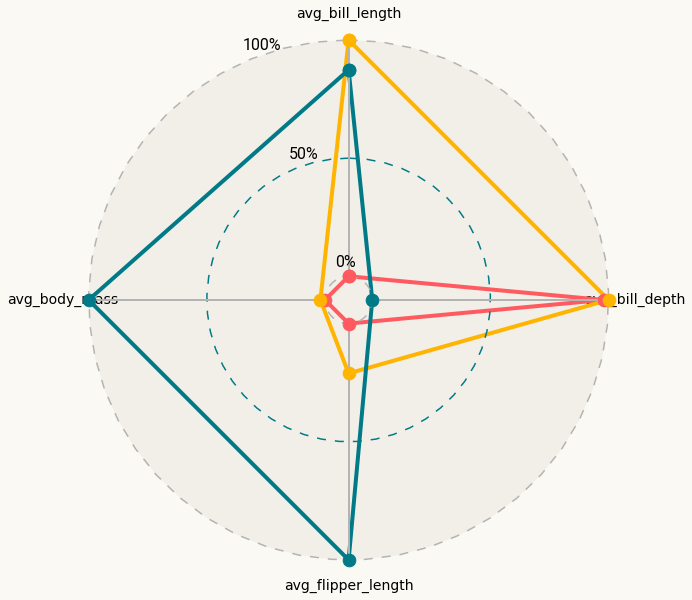

In [10]:
# Set values for the angular axis (x)
ax.set_xticks(ANGLES[:-1])
ax.set_xticklabels(VARIABLES, size=14)

# Remove lines for radial axis (y)
ax.set_yticks([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add custom lines for radial axis (y) at 0, 0.5 and 1.
ax.plot(HANGLES, H0, ls=(0, (6, 6)), c=GREY70)
ax.plot(HANGLES, H1, ls=(0, (6, 6)), c=COLORS[2])
ax.plot(HANGLES, H2, ls=(0, (6, 6)), c=GREY70)

# Now fill the area of the circle with radius 1.
# This create the effect of gray background.
ax.fill(HANGLES, H2, GREY_LIGHT)

# Custom guides for angular axis (x).
# These four lines do not cross the y = 0 value, so they go from 
# the innermost circle, to the outermost circle with radius 1.
ax.plot([0, 0], [0, 1], lw=2, c=GREY70)
ax.plot([np.pi, np.pi], [0, 1], lw=2, c=GREY70)
ax.plot([np.pi / 2, np.pi / 2], [0, 1], lw=2, c=GREY70)
ax.plot([-np.pi / 2, -np.pi / 2], [0, 1], lw=2, c=GREY70)

# Add levels -----------------------------------------------------
# These labels indicate the values of the radial axis
PAD = 0.05
ax.text(-0.4, 0 + PAD, "0%", size=16, fontname="Roboto")
ax.text(-0.4, 0.5 + PAD, "50%", size=16, fontname="Roboto")
ax.text(-0.4, 1 + PAD, "100%", size=16, fontname="Roboto")

fig

## Final chart

Chart clutter has been drastically reduced and the plot above looks much better, that's great! But there's still room for improvement. This plot needs a good title, a legend to make the colors insightful as well as a fix for the overlap between labels and figures.

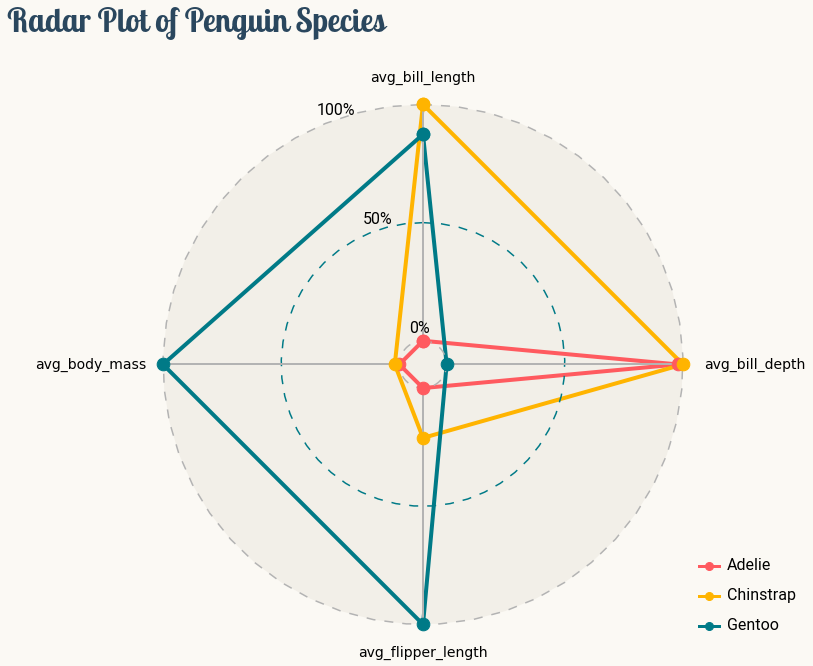

In [11]:
# Create and add legends -----------------------------------------
# Legends are made from scratch.

# Iterate through species names and colors.
# These handles contain both markers and lines.
handles = [
    Line2D(
        [], [], 
        c=color, 
        lw=3, 
        marker="o", 
        markersize=8, 
        label=species
    )
    for species, color in zip(SPECIES, COLORS)
]

legend = ax.legend(
    handles=handles,
    loc=(1, 0),       # bottom-right
    labelspacing=1.5, # add space between labels
    frameon=False     # don't put a frame
)

# Iterate through text elements and change their properties
for text in legend.get_texts():
    text.set_fontname("Roboto") # Change default font 
    text.set_fontsize(16)       # Change default font size

# Adjust tick label positions ------------------------------------
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS[0::2]:
    tick.set_pad(X_VERTICAL_TICK_PADDING)
    
for tick in XTICKS[1::2]:
    tick.set_pad(X_HORIZONTAL_TICK_PADDING)

# Add title ------------------------------------------------------
fig.suptitle(
    "Radar Plot of Penguin Species",
    x = 0.1,
    y = 1,
    ha="left",
    fontsize=32,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
)
fig